## Astropy

Astropy is a popular tool/library in Python that contains key functionality and common tools required for performing astronomical data analysis and astrophysical calculations in python. It was mainly developed as a part of the **Astropy Project** which aims to produce a robust ecosystem of packages that provides a wide range of tools for handling astronomical data, data analysis and data preoprocessing and other calculations in astronomical research.

In this notebook, we will be giving a brief introduction to Astropy, some common **File Formats** encountered in astronomical data analysis, **Modeling** etc. The installation steps for astropy is as simple as other packages in python using pip.
```bash
pip install astropy
```

### FITS Format

One of the most commonly encountered data file format in **Astronomy**. **FITS** format refers to **Felixble Image Transport System**. It is a digital file format in astronomy, it is basically used for data processing, transmission and storage in data and is stored in the form of **2-D Arrays, Tables**. A **FITS** file may also be used to store non-Image data like spectral, photon lists etc. A **FITS** file may also contain different extensions each of which represents a different data structure. For example, it is possible to store both X-ray and infrared exposures in the same **FITS** file. 

**Images** in  **FITS** are essentially stored in human-readable ASCII headers, this header is used for calculating some byte offset to some information in the data to have direct access to data cells. A FITS file may contain more than one headers containing **ASCII card images** which provides information related to important parameters like origin, size, coordinates, binary data format, history of the data etc.

Advantages of fits file :
1. Can store raw and uncompressed data like .gif, .png, .jpg etc.
2. Also contain information about how the image was obtained

Disadvantages: 
1. Manipulations required to show files present in fits
2. Large Memory

In [116]:
from astropy.io import fits #importing the necessary functions from astropy 
import numpy as np
import matplotlib.pyplot as plt

## opening an already existing FITS file
fitsImage = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open(fitsImage)


In [41]:
# to read your own fits file 
from astropy.io import fits
hdul = fits.open("ch2_xsm_20220326_v1_level1.fits")

In [42]:
primheader = hdul[0].header
primheader

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsml1gen '          / Creator of file                                
FILENAME= 'ch2_xsm_20220326_v1_level1.fits' / Name of file                      
CONTENT = 'L1 Science file' 

The above functions returns a **HDUList** which is a list like collection of **Header Data Unit** objects. It represents the highest level component of a FITS data or table, consisting of headers and arrays. The **hdu[0]** represents the **Primary Header** and the **hdu[1]** represents the first extension of header.

In [45]:
hdul.info()
print()
primheader = hdul[0].header
print()
# print(primheader)
print("Number of Entries in the Primary HDU are: {}".format(len(primheader)))
print()
print(primheader['TELESCOP']) # which telescope was used to take the image
print(primheader['DATE']) # displays the DATE in dd/mm/yyyy format
print(primheader['ORIGIN']) # check the origin of the file
print(primheader['SIMPLE']) # check whether the file conform to the FITS Standard
print(primheader['NAXIS']) # number of data axis

Filename: ch2_xsm_20220326_v1_level1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  DATA          1 BinTableHDU     57   86380R x 7C   [D, 30A, J, D, D, 2048B, I]   


Number of Entries in the Primary HDU are: 15

CH-2_ORBITER
2022-04-08T12:29:00
PRLPOC
True
0


In [104]:
bintable = hdul[1].data

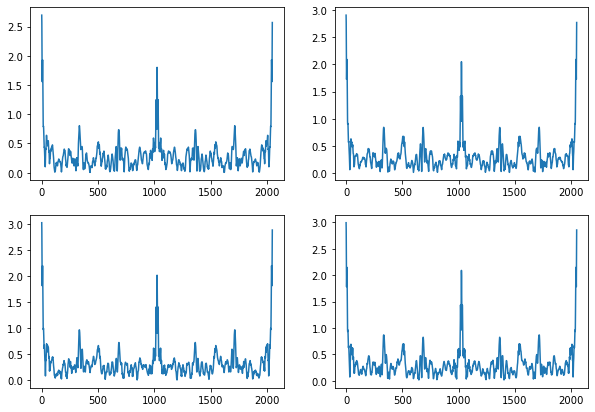

In [119]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.plot(range(0, len(bintable[10][5])),np.abs(np.fft.ifft(bintable[90][5])))
plt.subplot(2,2,2)
plt.plot(range(0, len(bintable[20][5])),np.abs(np.fft.ifft(bintable[20][5])))
plt.subplot(2,2,3)
plt.plot(range(0, len(bintable[30][5])),np.abs(np.fft.ifft(bintable[30][5])))
plt.subplot(2,2,4)
plt.plot(range(0, len(bintable[40][5])),np.abs(np.fft.ifft(bintable[40][5])))
plt.show()

In [110]:
primary = hdul[0]
# primary.data[0]

# prints the header/metadata of the tabl = hdul[1]
hdul[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 2108 / width of table in bytes                        
NAXIS2  =                86380 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    7 / number of fields in each row                   
TTYPE1  = 'Time    '           / MET Since 2017-01-01 00:00:00 UTC              
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'UTCString'          / UTC String                                     
TFORM2  = '30A       '         / data format of field: String                   
TTYPE3  = 'FrameNumber'     

In [106]:
## use the set() method to add a new card array or append a new one in the Primary header 
primheader.set('observer', 'Galileo')
## adding comments to the primary header 
primheader['comment'] = 'I like astronomy'
primheader['comment'] = 'I like doing Solar Flare analysis'
primheader['comment']

  FITS (Flexible Image Transport System) format is defined in 'Astronomy
  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
I like astronomy
I like doing Solar Flare analysis
I like astronomy
I like doing Solar Flare analysis

These are some of the common things you can do with the headers, for other details please refer to the documentation [Docs](https://docs.astropy.org/en/stable/io/fits/index.html)

Next comes the data part in the FITS file, preferably an Image

In [107]:
from astropy.table import Table
import numpy as np

a = np.random.randint(50, size=(5,4))
# Creation of a table from a Numpy Array
table = Table(a, names=('a', 'b', 'c', 'd'),meta={'keywords' : {'key1','val1'}})
table['a'].unit = 'Random numbers..not unit'
table['a'].description = 'This column consists of random numbers'
print(table)

# Getting table properties like columns, rows, meta info
print(table.colnames)
print(table.columns)
print(table.meta)

# accessing table entities
print(table['a']) # accessing the entrire column
print(table['b'][2])
print(table['b'].unit)
print(table['b','c'])

           a              b   c   d 
Random numbers..not unit            
------------------------ --- --- ---
                      32  23  40   7
                      31  30  26  38
                      24  46  31  32
                      26  42  23  15
                      30  47  44  10
['a', 'b', 'c', 'd']
<TableColumns names=('a','b','c','d')>
{'keywords': {'key1', 'val1'}}
           a            
Random numbers..not unit
------------------------
                      32
                      31
                      24
                      26
                      30
46
None
 b   c 
--- ---
 23  40
 30  26
 46  31
 42  23
 47  44


In [36]:
table.pprint()   # Same as above
table.pprint(show_unit=True)  # Show column unit
table.pprint(show_name=False)  # Do not show column names
table.pprint_all() # Print full table no matter how long / wide it is (same as t.pprint(max_lines=-1, max_width=-1))

           a              b   c   d 
Random numbers..not unit            
------------------------ --- --- ---
                      35  42   9   5
                      49   4  20  43
                       7  15  14  49
                      15  30  48  30
                      20  12  35  38
           a              b   c   d 
Random numbers..not unit            
------------------------ --- --- ---
                      35  42   9   5
                      49   4  20  43
                       7  15  14  49
                      15  30  48  30
                      20  12  35  38
Random numbers..not unit            
------------------------ --- --- ---
                      35  42   9   5
                      49   4  20  43
                       7  15  14  49
                      15  30  48  30
                      20  12  35  38
           a              b   c   d 
Random numbers..not unit            
------------------------ --- --- ---
                      35  42   9   5
 

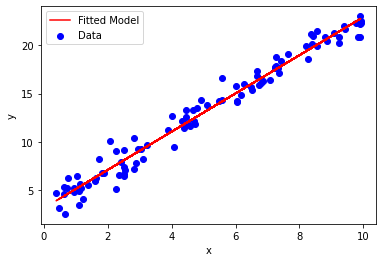

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# define a model for a line
line_orig = models.Linear1D(slope=2.0, intercept=3)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements
npts = 100
np.random.seed(45)
x = np.random.uniform(0.0, 10.0, npts)
y = line_orig(x)
y += np.random.normal(0.0, 1, npts)

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line = fit(line_init, x, y)

# plot the model
plt.figure()
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, fitted_line(x), color='red',label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In order to get to have a better knowledge about different functions of **Astropy**, please refer to the official documentation [Astropy Doc](https://docs.astropy.org/en/stable/index.html
)